In [26]:
import pandas as pd

# Read data for X and y
df7 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/7.csv")
df15 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/15.csv")
df16 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/16.csv")
df21 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/21.csv")
df33 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/33.csv")
df56 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/56.csv")
df68 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/68.csv")
df95 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/95.csv")
df1000 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/1000.csv")
df1001 = pd.read_csv("../Data/Train/Random Samples/10000/Sequences/1001.csv")

df = pd.concat([df7,df15, df16, df21, df33, df56, df68, df95, df1000, df1001], ignore_index=True)

X = df.drop(columns=['y']).values
y = df['y'].values

In [16]:
from imblearn.over_sampling import SMOTE

#Define ratios for minority classes
sampling_ratios = {
    15: int(0.1 * 342485),  # 10% of samples of class 68
    16: int(0.05 * 342485),
    21: int(0.1 * 342485),
    33: int(0.2 * 342485),
    56: int(0.1 * 342485),
    95: int(0.1 * 342485),
    1000: int(0.1 * 342485),
    1001: int(0.7 * 342485)
}
# Apply SMOTE to balance the dataset
sm = SMOTE(k_neighbors=4, random_state=42, sampling_strategy=sampling_ratios, n_jobs=4)
X_res, y_res = sm.fit_resample(X, y)

#oversampler = RandomOverSampler(random_state=42)
#X_res, y_res = oversampler.fit_resample(X,y)

C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", n_estimators = 50, max_features=7, min_samples_split=3, min_samples_leaf=4)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.5681764146457442


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

model = RandomForestClassifier()

grid_space={'n_estimators':[10,20,30,40,50,60],
              'max_features':[1,3,5,7,9],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3],
              'criterion': ["entropy","log_loss"]
           }

grid = GridSearchCV(model,param_grid=grid_space,cv=2,scoring="f1_micro",verbose=10)

model_grid = grid.fit(X_train,y_train)

Fitting 2 folds for each of 360 candidates, totalling 720 fits
[CV 1/2; 1/360] START criterion=entropy, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/2; 1/360] END criterion=entropy, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/2; 1/360] START criterion=entropy, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/2; 1/360] END criterion=entropy, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/2; 2/360] START criterion=entropy, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 1/2; 2/360] END criterion=entropy, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20;, score=nan total time=   0.0s
[CV 2/2; 2/360] START criterion=entropy, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=20
[CV 2/2; 2/360] END criterion=entropy, max_features=

C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    valida

In [29]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}
Best score is: 0.5566388922002279


In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.87      0.93      0.90      3376
          15       0.76      0.47      0.58       173
          16       0.72      0.82      0.76        83
          21       0.33      0.03      0.05        37
          33       0.39      0.37      0.38      3303
          56       0.72      0.41      0.52      2284
          68       0.43      0.55      0.48      3279
          95       0.17      0.01      0.02        76
        1000       0.85      0.50      0.63       910
        1001       0.45      0.53      0.49      3303

    accuracy                           0.56     16824
   macro avg       0.57      0.46      0.48     16824
weighted avg       0.58      0.56      0.56     16824



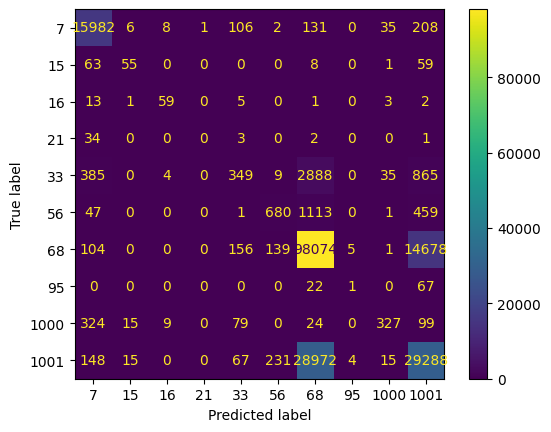

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [30]:
#Verification with new unseen data
# Read the dataframe
df_verif7 = pd.read_csv("data/Test/Sequences/7.csv")
df_verif15 = pd.read_csv("data/Test/Sequences/15.csv")
df_verif16 = pd.read_csv("data/Test/Sequences/16.csv")
df_verif21 = pd.read_csv("data/Test/Sequences/21.csv")
df_verif33 = pd.read_csv("data/Test/Sequences/33.csv")
df_verif56 = pd.read_csv("data/Test/Sequences/56.csv")
df_verif68 = pd.read_csv("data/Test/Sequences/68.csv")
df_verif95 = pd.read_csv("data/Test/Sequences/95.csv")
df_verif1000 = pd.read_csv("data/Test/Sequences/1000.csv")
df_verif1001 = pd.read_csv("data/Test/Sequences/1001.csv")

# Drop any rows with missing values
df_verif = pd.concat([df_verif7, df_verif15, df_verif16, df_verif21, df_verif33, df_verif56, df_verif68, df_verif95, df_verif1000, df_verif1001], ignore_index=True)

# Split the data into input features (X) and target variable (y)
X_verif = df_verif.drop("y", axis=1).values
y_verif = df_verif["y"].values

In [31]:
y_pred_verif = model.predict(X_verif)
print(classification_report(y_verif, y_pred_verif))

              precision    recall  f1-score   support

           7       0.94      0.89      0.92      3287
          15       0.30      0.11      0.16        28
          16       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         7
          33       0.00      0.00      0.00         3
          56       0.60      0.20      0.30      1658
          68       0.71      0.89      0.79     44424
          95       0.00      0.00      0.00        44
        1000       0.41      0.07      0.12        96
        1001       0.74      0.52      0.61     30917

    accuracy                           0.73     80465
   macro avg       0.37      0.27      0.29     80465
weighted avg       0.73      0.73      0.72     80465



C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
